SciPy: SciPy is a scientific computation library that uses NumPy underneath.SciPy stands for Scientific Python.
It provides more utility functions for optimization, stats and signal processing.

In [2]:
#Constants:As SciPy is more focused on scientific implementations, it provides many built-in scientific constants.
from scipy import constants

In [3]:
print(constants.pi)

3.141592653589793


In [4]:
print(constants.kilo)

1000.0


In [5]:
#different constants avaialable
print(dir(constants))

['Avogadro', 'Boltzmann', 'Btu', 'Btu_IT', 'Btu_th', 'ConstantWarning', 'G', 'Julian_year', 'N_A', 'Planck', 'R', 'Rydberg', 'Stefan_Boltzmann', 'Wien', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_obsolete_constants', 'acre', 'alpha', 'angstrom', 'arcmin', 'arcminute', 'arcsec', 'arcsecond', 'astronomical_unit', 'atm', 'atmosphere', 'atomic_mass', 'atto', 'au', 'bar', 'barrel', 'bbl', 'blob', 'c', 'calorie', 'calorie_IT', 'calorie_th', 'carat', 'centi', 'codata', 'constants', 'convert_temperature', 'day', 'deci', 'degree', 'degree_Fahrenheit', 'deka', 'dyn', 'dyne', 'e', 'eV', 'electron_mass', 'electron_volt', 'elementary_charge', 'epsilon_0', 'erg', 'exa', 'exbi', 'femto', 'fermi', 'find', 'fine_structure', 'fluid_ounce', 'fluid_ounce_US', 'fluid_ounce_imp', 'foot', 'g', 'gallon', 'gallon_US', 'gallon_imp', 'gas_constant', 'gibi', 'giga', 'golden', 'golden_ratio', 'grain', 'gram', 'gravitational_con

Optimizers: Optimizers are a set of procedures defined in SciPy that either find the minimum value of a function,or the root of an equation.


In [6]:
from scipy.optimize import root
from math import cos

def eqn(x):
  return x + cos(x)

myroot = root(eqn, 0)

print(myroot.x)

[-0.73908513]


In [7]:
from scipy.optimize import minimize

def eqn(x):
  return x**2 + x + 2

mymin = minimize(eqn, 0, method='BFGS')

print(mymin)

      fun: 1.75
 hess_inv: array([[0.50000001]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([-0.50000001])


Sparse Data: Sparse data is data that has mostly unused elements. It is a data set where most of the item values are zero.
There are primarily two types of sparse matrices that we use:

CSC - Compressed Sparse Column. For efficient arithmetic, fast column slicing.

CSR - Compressed Sparse Row. For fast row slicing, faster matrix vector products

In [8]:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([0, 0, 0, 0, 0, 1, 1, 0, 2])

print(csr_matrix(arr))

  (0, 5)	1
  (0, 6)	1
  (0, 8)	2


In [9]:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

print(csr_matrix(arr).data)

[1 1 2]


In [10]:
print(csr_matrix(arr).count_nonzero())

3


In [12]:
mat = csr_matrix(arr)
mat.eliminate_zeros()

print(mat)

  (1, 2)	1
  (2, 0)	1
  (2, 2)	2


In [13]:
mat = csr_matrix(arr)
mat.sum_duplicates()

print(mat)

  (1, 2)	1
  (2, 0)	1
  (2, 2)	2


In [14]:
newarr = csr_matrix(arr).tocsc()

print(newarr)

  (2, 0)	1
  (1, 2)	1
  (2, 2)	2


Graphs: Graphs are an essential data structure. SciPy provides us with the module scipy.sparse.csgraph for working with such data structures.

In [15]:
import numpy as np
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print(connected_components(newarr))

(1, array([0, 0, 0]))


In [17]:
import numpy as np
from scipy.sparse.csgraph import dijkstra
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print(dijkstra(newarr, return_predecessors=True, indices=0))

(array([0., 1., 2.]), array([-9999,     0,     0]))


In [18]:
import numpy as np
from scipy.sparse.csgraph import depth_first_order
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 0, 1],
  [1, 1, 1, 1],
  [2, 1, 1, 0],
  [0, 1, 0, 1]
])

newarr = csr_matrix(arr)

print(depth_first_order(newarr, 1))

(array([1, 0, 3, 2]), array([    1, -9999,     1,     0]))


In [19]:
import numpy as np
from scipy.sparse.csgraph import breadth_first_order
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 0, 1],
  [1, 1, 1, 1],
  [2, 1, 1, 0],
  [0, 1, 0, 1]
])

newarr = csr_matrix(arr)

print(breadth_first_order(newarr, 1))

(array([1, 0, 2, 3]), array([    1, -9999,     1,     1]))


Spatial Data: Spatial data refers to data that is represented in a geometric space.SciPy provides us with the module scipy.spatial, which has functions for working with spatial data.

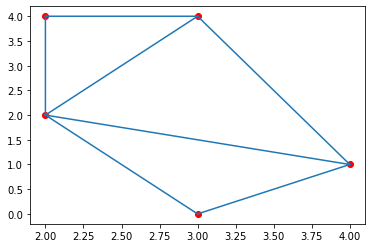

In [20]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1]
])

simplices = Delaunay(points).simplices

plt.triplot(points[:, 0], points[:, 1], simplices)
plt.scatter(points[:, 0], points[:, 1], color='r')

plt.show()

In [21]:
from scipy.spatial import KDTree

points = [(1, -1), (2, 3), (-2, 3), (2, -3)]

kdtree = KDTree(points)

res = kdtree.query((1, 1))

print(res)

(2.0, 0)


In [22]:
from scipy.spatial.distance import euclidean

p1 = (1, 0)
p2 = (10, 2)

res = euclidean(p1, p2)

print(res)

9.219544457292887


In [23]:
from scipy.spatial.distance import cosine

p1 = (1, 0)
p2 = (10, 2)

res = cosine(p1, p2)

print(res)

0.019419324309079777


In [24]:
from scipy.spatial.distance import hamming

p1 = (True, False, True)
p2 = (False, True, True)

res = hamming(p1, p2)

print(res)

0.6666666666666666


Matlab arrays: SciPy provides us with interoperability with Matlab as well.
SciPy provides us with the module scipy.io, which has functions for working with Matlab arrays.

In [27]:
from scipy import io
import numpy as np

arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,])

io.savemat('arr.mat', {"vec": arr})

mydata = io.loadmat('arr.mat', squeeze_me=True)

print(mydata)

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Tue Jun 29 20:50:34 2021', '__version__': '1.0', '__globals__': [], 'vec': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])}


In [28]:
print(mydata['vec'])

[0 1 2 3 4 5 6 7 8 9]


Interpolation: Interpolation is a method for generating points between given points.SciPy provides us with a module called scipy.interpolate which has many functions to deal with interpolation

In [29]:
from scipy.interpolate import interp1d
import numpy as np

xs = np.arange(10)
ys = 2*xs + 1

interp_func = interp1d(xs, ys)

newarr = interp_func(np.arange(2.1, 3, 0.1))

print(newarr)

[5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8]


In [30]:
from scipy.interpolate import UnivariateSpline
import numpy as np

xs = np.arange(10)
ys = xs**2 + np.sin(xs) + 1

interp_func = UnivariateSpline(xs, ys)

newarr = interp_func(np.arange(2.1, 3, 0.1))

print(newarr)

[5.62826474 6.03987348 6.47131994 6.92265019 7.3939103  7.88514634
 8.39640439 8.92773053 9.47917082]


In [31]:
from scipy.interpolate import Rbf
import numpy as np

xs = np.arange(10)
ys = xs**2 + np.sin(xs) + 1

interp_func = Rbf(xs, ys)

newarr = interp_func(np.arange(2.1, 3, 0.1))

print(newarr)

[6.25748981 6.62190817 7.00310702 7.40121814 7.8161443  8.24773402
 8.69590519 9.16070828 9.64233874]


Significance tests: Statistical significance means that the result that was produced has a reason behind it, it was not produced randomly, or by chance. SciPy provides us with a module called scipy.stats, which has functions for performing statistical significance tests.

In [32]:
import numpy as np
from scipy.stats import ttest_ind

v1 = np.random.normal(size=100)
v2 = np.random.normal(size=100)

res = ttest_ind(v1, v2)

print(res)

Ttest_indResult(statistic=-0.8946200930160376, pvalue=0.3720764091279761)


In [33]:
import numpy as np
from scipy.stats import kstest

v = np.random.normal(size=100)

res = kstest(v, 'norm')

print(res)

KstestResult(statistic=0.049441247603652094, pvalue=0.9573155165817852)


In [34]:
import numpy as np
from scipy.stats import describe

v = np.random.normal(size=100)
res = describe(v)

print(res)

DescribeResult(nobs=100, minmax=(-2.7061931550101272, 2.597787656935692), mean=-0.0598035289784018, variance=1.3328622722305705, skewness=0.15156125915759774, kurtosis=-0.3322246614123072)


In [35]:
import numpy as np
from scipy.stats import skew, kurtosis

v = np.random.normal(size=100)

print(skew(v))
print(kurtosis(v))

0.05540377122054867
-0.6679933811667751
